In [1]:
import pandas as pd
import hvplot.pandas
import numpy as np
from path import Path

In [2]:
# NOTE:
# Data is extracted from
# https://www.tradingview.com/chart/YcV16UR5/?symbol=FX_IDC%3AUSDCNY
# https://www.tradingview.com/chart/YcV16UR5/?symbol=FX_IDC%3AUSDJPY

# For some reason, their is no volume in this dataset under the volume column so I choose to exclude that here.

In [ ]:
# In 1985, the Plaza Accord Agreement happened which is probably what drove the changes you see with the currencies.
# https://www.youtube.com/watch?v=splYJ2HICBk

In [3]:
ICE_USDCNY_1D = Path("../FinTech-Project_2/Resources/ICE_USDCNY_1D.csv")
ICE_USDJPY_1D = Path("../FinTech-Project_2/Resources/ICE_USDJPY_1D.csv")

In [ ]:
# USD/CNY pair from Tradingview via Intercontinental Exchange (ICE)

In [4]:
usdcny_1D = pd.read_csv(
    ICE_USDCNY_1D,
    index_col="time",
    infer_datetime_format=True,
    parse_dates=True)

/tmp/ipykernel_54227/1249512733.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  usdcny_1D = pd.read_csv(


In [5]:
usdcny_1D = usdcny_1D.sort_index()
usdcny_1D = usdcny_1D[["open", "high", "low", "close"]]

usdcny_1D.head(10)

,open,high,low,close
time,,,,
1981-01-02,1.5341,1.5341,1.5341,1.5341
1981-01-05,1.5418,1.5418,1.5418,1.5418
1981-01-06,1.5264,1.5264,1.5264,1.5264
1981-01-07,1.5264,1.5264,1.5264,1.5264
1981-01-08,1.5264,1.5264,1.5264,1.5264
1981-01-09,1.5371,1.5371,1.5371,1.5371
1981-01-12,1.5371,1.5371,1.5371,1.5371
1981-01-13,1.5449,1.5449,1.5449,1.5449
1981-01-14,1.5449,1.5449,1.5449,1.5449


<Axes: xlabel='time'>

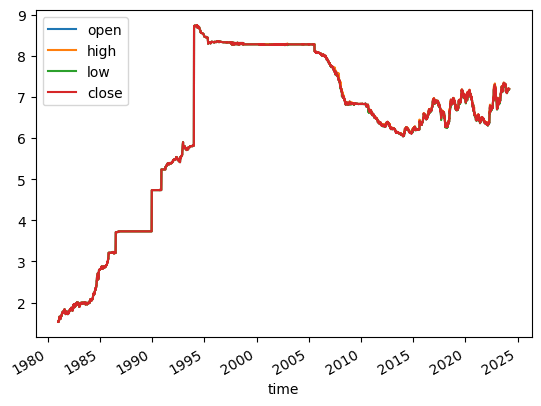

In [6]:
usdcny_1D.plot()

In [ ]:
# USD/JPY pair from Tradingview via Intercontinental Exchange (ICE)

In [7]:
usdcny_1D_1985 = usdcny_1D.loc["1985"]
usdcny_1D_1985

,open,high,low,close
time,,,,
1985-01-02,2.8027,2.8027,2.8027,2.8027
1985-01-03,2.8167,2.8167,2.8167,2.8167
1985-01-04,2.8167,2.8167,2.8167,2.8167
1985-01-07,2.8167,2.8167,2.8167,2.8167
1985-01-08,2.8167,2.8167,2.8167,2.8167
...,...,...,...,...
1985-12-24,3.2095,3.2095,3.2095,3.2095
1985-12-26,3.2095,3.2095,3.2095,3.2095
1985-12-27,3.2095,3.2095,3.2095,3.2095


<Axes: title={'center': 'USDCNY During 1985'}, xlabel='time'>

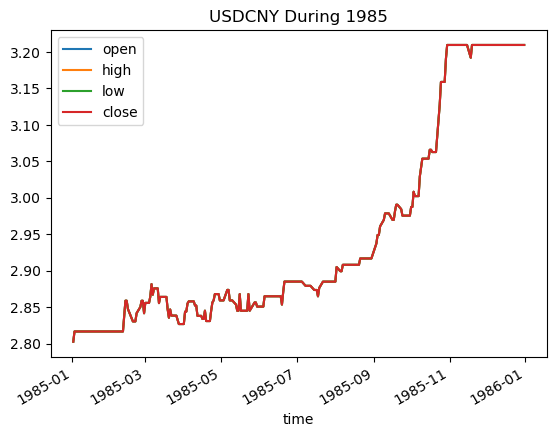

In [8]:
usdcny_1D_1985.plot(title="USDCNY During 1985")

In [9]:
usdjpy_1D = pd.read_csv(
    ICE_USDJPY_1D,
    index_col="time",
    infer_datetime_format=True,
    parse_dates=True)

/tmp/ipykernel_54227/2093499537.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  usdjpy_1D = pd.read_csv(


In [10]:
usdjpy_1D = usdjpy_1D.sort_index()
usdjpy_1D = usdjpy_1D[["open", "high", "low", "close"]]

usdjpy_1D.head(10)

,open,high,low,close
time,,,,
1980-09-09,216.50,216.50,216.50,216.50
1980-09-10,216.59,216.59,216.59,216.59
1980-09-11,214.22,214.22,214.22,214.22
1980-09-12,212.70,212.70,212.70,212.70
1980-09-15,212.65,212.65,212.65,212.65
1980-09-16,211.55,211.55,211.55,211.55
1980-09-17,211.65,211.65,211.65,211.65
1980-09-18,212.95,212.95,212.95,212.95
1980-09-19,210.95,210.95,210.95,210.95


<Axes: xlabel='time'>

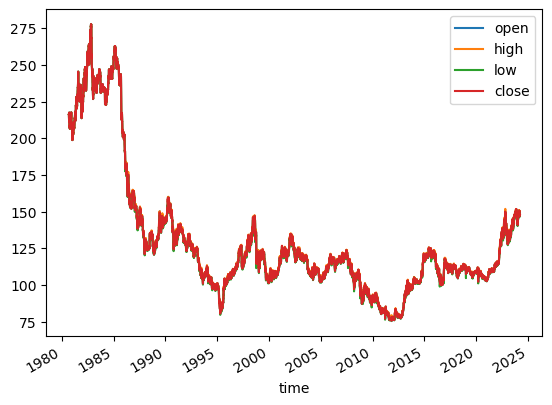

In [11]:
usdjpy_1D.plot()

In [12]:
usdjpy_1D_1985 = usdjpy_1D.loc["1985"]
usdjpy_1D_1985

,open,high,low,close
time,,,,
1985-01-02,251.80,251.80,251.80,251.80
1985-01-03,252.45,252.45,252.45,252.45
1985-01-04,253.20,253.20,253.20,253.20
1985-01-07,255.95,255.95,255.95,255.95
1985-01-08,253.75,253.75,253.75,253.75
...,...,...,...,...
1985-12-23,202.45,202.45,202.45,202.45
1985-12-24,202.75,202.75,202.75,202.75
1985-12-26,202.80,202.80,202.80,202.80


<Axes: title={'center': 'USDJPY During 1985'}, xlabel='time'>

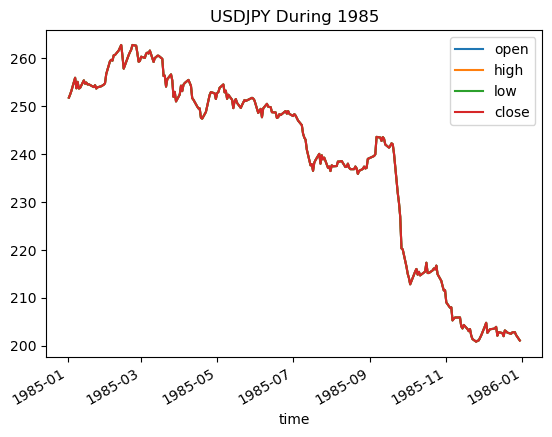

In [13]:
usdjpy_1D_1985.plot(title="USDJPY During 1985")

<Axes: xlabel='time'>

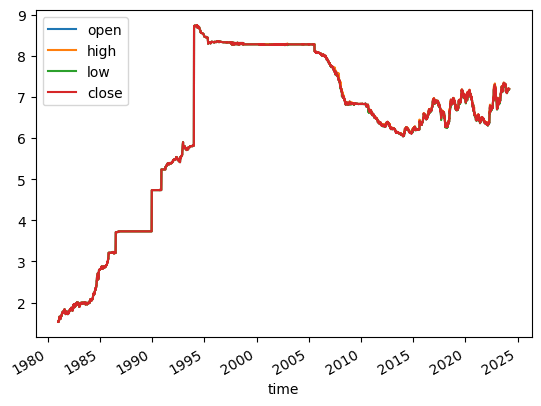

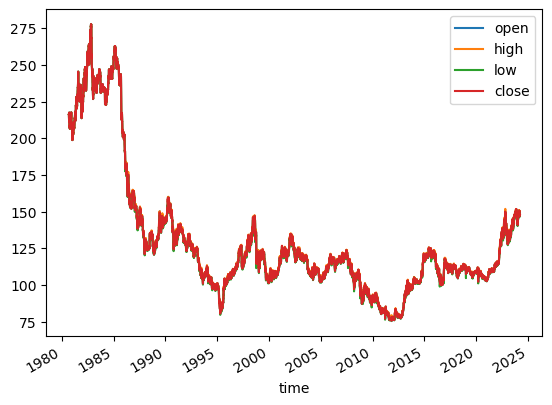

In [36]:
usdcny_1D.plot()
usdjpy_1D.plot()